# Strojové učení - Příprava dat, Chyby v datech a bias, Korelace a kauzalita

## Úvod

Příprava dat je stěžejní část v procesu strojového učení. Vlatně bych skoro řekl, že ta nejvetší a nejdůležitější. Postupně si řekneme, co všechno je potřeba udělat předtím, než se pustíme do vůběru modelu, jeho učení a ladění hyperparametrů.              
Ale nejdříve tak úvodem. Co je to strojové učení? Strojové učení se snaží v datech najít nějaké spojitosti a na základě nich pomocí nějakého algoritmu odhadovat cílovou proměnnou. Můžeme odhadovat spoustu věcí. Cenu, kategorii, zda někdo má nemoc, ... je toho zkrátka spoustu. Základem pro všechno jsou ale správná data, bez nich ani ten nejlepší algoritmus nic nezmůže.                  
Sběr dat a jejich zpracování je tedy značnou části v procesu strojového učení. Na konkrétní algoritmy se podíváme více v dalších otázkách, nicméně i zde mohu někdy zmínit jméno nějakého z nich. Měli bychom si ale rozdělit strojové učení do dvou základních skupin, regresi a klasifikaci. Regresní modely odhadují nějaké reálné číslo, např. právě tu cenu. Klasifikace je naopak, odhadujeme-li nějakou třídu. Třeba finální známku, třídy 1 až 5, nebo zda má někdo rakovinu či ne. Když se rozhodujeme jen mezi dvěma třídami, nazýváme to binární klasifikací.                    
Odhadujeme vždy tzv. závislou proměnnou (y) pomocí proměnných nazávislých (vektor x), těm budeme říkat fíčury.                  
Pro demonstraci budu využívat datasety dostupné v knihovně Scikit-learn a Ucimlrepo

**Potřebné knihovny**

In [ ]:
!pip install ucimlrepo
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install joblib
!pip install category_encoders
!pip install matplotlib
!pip install seaborn
!pip install scipy


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement pyplot (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for pyplot



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\honzi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## **1** Prozkoumání dat

Ze všeho nejdříve je potřeba nastudovat naše data.

In [37]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [38]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

Dobrým pomocníkem na začátek je metoda *info()*. Ta nám poskytne dobrý základní vhled do dat. Vrací nám názvy sloupců, počet řádků bez prázdných hodnot a datový typ v řádku. Nakouknout to datasetu můžeme také metodou *head()*. Ta nám vrátí prvních pár řádků.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [40]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Dalšími užitečnými metodami a vlastnostmi jsou *dtypes*, *unique()* a *shape*. První nám poskytne datové typy, druhý lze využít, cheme-li zjistit, jakých všech hodnot může fíčura nabývat. Poslední nám vrátí tvar dat *(počet řádků, počet sloupců)*

In [41]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [42]:
df['sepal length (cm)'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [43]:
df.shape

(150, 4)

Posledním jednoduchým nástrojem je metoda *describe()*. Ta nám poskytne trochu statististický vhled do dat. Pro každý řádek nám vrátí jeho průměr, směrodatnou odchylku, medián (50%), min, max, první a třetí kvartil.

In [44]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **2** Chybějící hodnoty

Prvním problémem, které se může v datech vyskytnou a který musíme řešit, jsou chybějící hodnoty. Modely s nimi zpravidla neumějí pracovat a mohou působit problémy při trénování, potenciálně zhoršit kvalitu modelu.         
Prázdné hodnoty mohou vzniknout např. v důsledku chyb při manipulaci s daty. Mohou nastat i následkem nevyplněných informací v dotazníku, nedustupných informací v nějakém případě...               
Chybějící hodnoty lze vyřešit vzásadě dvěma různými způsoby. Prvním z nich je záznamy s chybějícími hodnotami prostě **vyhodit**. Tím ale samozřejmě ztrácíme data. Jinou možností je **nahradit** je. To lze udělat různě. Můžeme nahrazovat nejčastější hodnotou, nějakou další kategorií, mediánem, průměrem.

In [46]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

In [56]:
data = fetch_ucirepo(id=2)

X = data.data.features
y = data.data.targets

df = pd.concat([X, y], axis=1, join="inner")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Nejjednodušší způsob, jak zjistit, zda se v datech nachází nějaké prázdné hodnoty, je metoda *isna()*. Ta vrátí zpět dataframe, který na místech, kde se nachází prázdná hodnota, obsahuje True a na ostatních False. Následně lze využít agregační metodu *sum()*. Ta nám pro každou fíčuru najde, kolik má chybějících hodnot.

In [57]:
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Kdybychom chtěli odstranit řádky s prázdnými hodnotami, stačí použít metodu *dropna()*. Ta vrátí pandas dataframe bez těchto řádků. Takto funguje spousta metod. Pro uložení těchto změn je tedy potřeba přepsat původní dataframe s tímto novým, třeba takto: *df = df.dropna()*.

In [60]:
df.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


My ale zde nebudeme řádky mazat. Všechny chybějící hodnoty jsou v rámci kategorických proměnných. My je nahradíme nějakou hodnotou. Vzhledem k tomu, že to jsou s největší pravděpodobností nějaké neznámé informace, nahradíme je hodnotou '?'. Nejdříve musíme ale tyto proměnné typu *object* na *category*.

In [65]:
df[df.select_dtypes('object').columns] = df[df.select_dtypes('object').columns].astype('category')
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
dtype: object

In [68]:
df[['workclass', 'occupation', 'native-country']] = df[['workclass', 'occupation', 'native-country']].fillna('?')
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## **3** Duplicity 

Dalším problémem, který může nastat např. při nesprávné manipulaci s daty, jsou duplicity. Můžeme mít duplicity v rámci celého řádku nebo třeba jen určité fíčury. Existují případy, kdy nám duplicity nevadí a naopak je chceme ponechat. Pokud jsou ale duplicity nechtěné, není nic jednoduššího, než je odstranit.              
Zmíním se zde i o tzv. **Biasu**. Bias je vlastně takové zaujatost naší datové sady. Pro ilustraci. Měl bych datovou sadu studentů, ve kterých by byla většina mužského pohlaví. Taková zada je velmi silně biasnutá, nemůžu z ní např. usuzovat nic chování studentek, protože je jich jen velmi malý počet.

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

In [ ]:
data = fetch_ucirepo(id=2)

X = data.data.features
y = data.data.targets

df = pd.concat([X, y], axis=1, join="inner")
df

Ke zjištění, zda se v našem datasetu nachází duplicity, se využívá metoda *duplicated()*. Když opět využijeme agragaci pomocí *sum()*, dostaneme počet duplicit v naší sadě. Duplicity můžeme odstranit metodou *drop_duplicates()*. Pomocí parametry *keep* můžeme nastavit, zda chceme zachovat první, nebo poslední výskyt duplicty, popř. zda chceme odstranit všechno.

In [72]:
df.duplicated().sum()

29

In [74]:
df = df.drop_duplicates(keep='first')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## **4** Kategorické proměnné

Dalším typickým problémem je interpretace kategorických proměnných. Máme několik možností ..            
Ještě než si je ale představíme, rozdělíme si tyto proměnné do dvou skupin. Nominální a ordinální. Nominální jsou takové, které nemají žádný přirozený řád. Třeba barvy. Červená, modrá, zelená.            
Ordinální na druhou stranu ale řád mají, lze jim přiradit číslo podle pořadí. Třeba dosažená úroveň vzdělání.

In [90]:
import pandas as pd
import numpy as np
import joblib

### Label encoding a Ordinal encoding     
Nejintuitivnější možností je tzv. label encoding, resp. ordinal encoding. Jednoduše každé třídě přiřadíme nějaké číslo. Hodí se pro ordinální proměnné, protože zachová jejich řád. Těm nominálním naopak může uměle nějaký udělit, a to zpravidla nechceme. Rozdíl mezi label encodingem a ordinal encodingem je nepatrný. Našel jsem v podstatě jen to, že u ordinal encodingu si pořadí definujeme sami. V realitě na tom moc nesejde. V knihovně Scikit-learn je ale mezi LabelEncoderem a OrdinalEncoderem rozdíl, který si vysvětlíme. K maturitě by mělo být jedno, zda to nazvete tak či onak.

**LabelEncoder** je třída v knihovně scikit-learn, která dovede zakódovat kategorickou proměnnou do řady celých čísel. Teď si ustálíme pár věcí. Vetšina takových tříd, včetně scalerů a modelů, se musí nejdříve tzv. nafitovat. To většinou znamená, že si z dat, ze kterých fitujeme, vezme třída nějakou statistiku nebo hodnoty. Třeba MinMaxScaler si vezme minimum a maximum, encoder si vezme třídy, model vytvoří svůj algoritmus, ... To, co si vezme se sady, na které jsme fitovali, následně využije při transformaci. Třeba právě LabelEncoder využije své naučené třídy, kterým přiřadil nějaké číslo.               
Nejprve musíme vždy třídu inicializovat, následně pomocí metody *fit()* nafitovat a nakonec pomocí metody *transform()* využít na datech. Existuje také metoda *fit_transform()*, která provede obojí najednou na stejných datech. Tedy nejdřív se na nich nafituje, pak je transformuje.                   
V následujícím příkladu máme jednoducou proměnnou o třech hodnotách. LabelEndocer ji pro nás zakóduje do čísel. Důležité je připomenou, že LabelEncoder by měl být použit pouze na cílovou proměnnou. Nelze u něj totiž specifikovat pořadí jednotlivých tříd, takže se na něj nelze spolehnout.                
Na konci se také vždy hodí encoder uložit, abychom mohli později výsledky modelu přeložit. To uděláme pomocí knihovny Joblib. Lze to ale udělat i pomocí Pickle.            
Pro zpětnou transformaci proměnných máme metodu *inverse_transform()*.

In [84]:
df = pd.DataFrame(data={'Performance': ["very good", "good", "bad"]})
df

,Performance
0,very good
1,good
2,bad


In [85]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [86]:
label_encoder.fit(df['Performance'])
label_encoder.classes_

array(['bad', 'good', 'very good'], dtype=object)

In [88]:
df['Performance_encoded'] = label_encoder.transform(df['Performance'])
df

,Performance,Performance_encoded
0,very good,2
1,good,1
2,bad,0


In [91]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
label_encoder_loaded = joblib.load('label_encoder.pkl')

In [94]:
label_encoder_loaded.inverse_transform(df['Performance_encoded'])

array(['very good', 'good', 'bad'], dtype=object)

**OrdinalEncoder** je další třída v knihovně scikit-learn. Dělá v podstatě to samé jako LabelEncoder s tím rozdílem, že je určen pro fíčury a lze tedy specifikovat pořadí.

In [96]:
df = pd.DataFrame(data={'Performance': ["good", "bad", "bad", "very good", "bad", "good"]})
df

,Performance
0,good
1,bad
2,bad
3,very good
4,bad
5,good


In [98]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[["bad", "good", "very good"]])
ordinal_encoder

OrdinalEncoder(categories=[['bad', 'good', 'very good']])

In [99]:
ordinal_encoder.fit(df[['Performance']])
ordinal_encoder

OrdinalEncoder(categories=[['bad', 'good', 'very good']])

In [101]:
df['Performance_encoded'] = ordinal_encoder.transform(df[['Performance']])
df

,Performance,Performance_encoded
0,good,1.0
1,bad,0.0
2,bad,0.0
3,very good,2.0
4,bad,0.0
5,good,1.0


### One Hot Encoding

**OneHotEncoder** je konečně encoder, který je vhodný pro nominální proměnné. Dělá tzv. vektorizaci kategorických proměnných. To znamená, že třeba kategorie červená, modrá, zelená převede na tři nové fíčury (červná, modrá, zelená). Každá z nich může obsahovat hodnotu jedna, nebo nula. Byla-li původní kategorie např. červená, ve sloupci červená bude jednička, v ostatních nula (možná proto OneHot, jakože jedna je vždy horká ..?)              
One hot encoding není zlý, máme-li jen několik tříd. Nicméně při větším počtu tříd zbytečně zvyšuje dimenzionalitu.

In [119]:
df = pd.DataFrame(data={'Color': ["red", "green", "blue", "green", "blue", "green"]})
df

,Color
0,red
1,green
2,blue
3,green
4,blue
5,green


In [103]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
one_hot_encoder

OneHotEncoder()

In [105]:
one_hot_encoder.fit(df[['Color']])

OneHotEncoder()

In [134]:
color_encoded = one_hot_encoder.transform(df[['Color']]).toarray()
color_encoded

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [137]:
color_encoded = pd.DataFrame(data=color_encoded, columns=one_hot_encoder.get_feature_names_out())
one_hot_encoder.categories_

[array(['blue', 'green', 'red'], dtype=object)]

In [140]:
df = pd.concat([df, color_encoded], axis=1)
df

,Color,Color_blue,Color_green,Color_red
0,red,0.0,0.0,1.0
1,green,0.0,1.0,0.0
2,blue,1.0,0.0,0.0
3,green,0.0,1.0,0.0
4,blue,1.0,0.0,0.0
5,green,0.0,1.0,0.0


### Binary encoding

**BinaryEncoder** je velmi podobný one hot encodingu. Vytvoří několik nových sloupců, nicméně místo toho, aby každý z nich reprezentoval jednu třídu, každý z nich reprezentuje jednu část binárního čísla. Každé číslo pak představuje jednu ze tříd. Tento přístup zajistí, že nominální data nebudou mít žádné umělé pořadí a zároveň šetří dimenze.

In [2]:
import category_encoders as ce
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame(data={'Color': ["red", "green", "blue", "green", "blue", "green"]})
df

,Color
0,red
1,green
2,blue
3,green
4,blue
5,green


In [8]:
binary_encoder = ce.BinaryEncoder(cols=['Color'])
binary_encoder

BinaryEncoder(cols=['Color'])

In [10]:
df = pd.concat([df, binary_encoder.fit_transform(df)], axis=1)
df

,Color,Color_0,Color_1
0,red,0,1
1,green,1,0
2,blue,1,1
3,green,1,0
4,blue,1,1
5,green,1,0


## **5** EDA (Exploratory Data Analysis)

Dalším důležitých krokem je EDA. Je to prozkoumání našich dat více do hloubky. Podíváme se na základní grafy. EDA ale zahrnuje i různou statististickou analýzu, analýzu pravděpodobnostního rozdělení, ...             
Z grafů lze vyčíst, jaké fíčury chceme, jaké jsou zbytečné. Je důležité se podívat také na korelace mezi daty. Korelace je nějaký vztah mezi dvěma hodnotami. Když jedna klesá, druhá roste. Nebo když jedna roste, roste i druhá. Když jedna fíčura roste a druhá má tendenci klesat, mluvíme o korelaci záporné. Pokud obě rostou společně, je korelace kladná.               
Máme základní dva typy korelace, Pearsonova, předpokládá lineární vztah, a Spearmanova, ta dovede pracovat i nelineárními vztahy (exponenciální, logaritmický, ... )        
Korelace ale nutně nemusí znamenat, že mezi daty je opravdu souvislost. Hezký příklad je např. korelace mezi konzumací zmrzliny a krádežmi na plážích. Konzumace zmrzliny nezpůsobuje krádeže na pláži, nicméně víme, že v teple chodí lidé na pláž a často si dávají i zmrzlinu. Mají-li však dvě věci jasnou souvislost, můžeme mluvit o tzv. kauzalitě. Tedy např. vyšší teplota venku znamená vyšší počet lidí, co si dají zmrzlinu. Abychom mohli mít kauzalitu, potřebujeme korelaci. Nicméně ne každá korelace znamená kauzalitu.

Ukážeme si teď nějaké základní zajímavé grafy.                   

In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram

Histogram je jedním z nejjednodušších grafů. Zobrazuje četnost nějaké hodnoty v souboru. Takový graf lze jednodušše vytvořit buď pomocí knihovny pandas nebo pyplot, chceme-li být trochu víc fancy

In [16]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

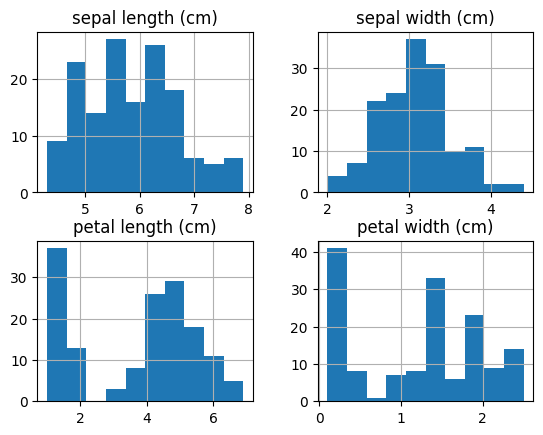

In [17]:
df.hist()

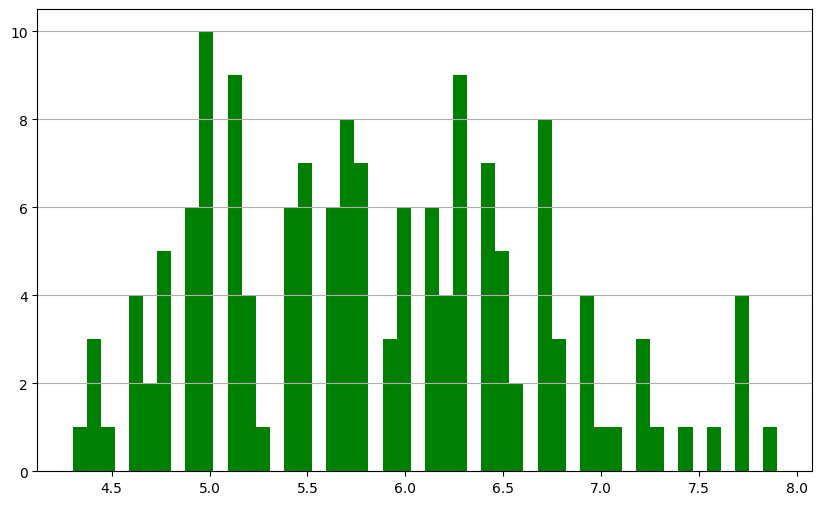

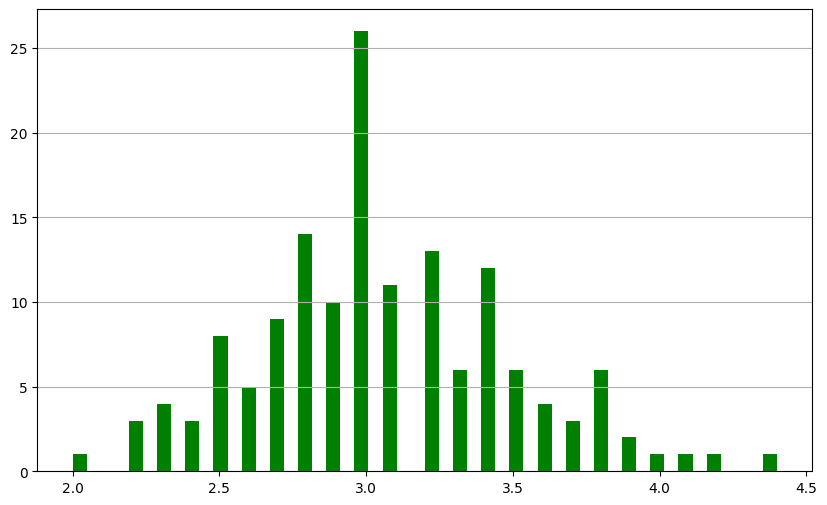

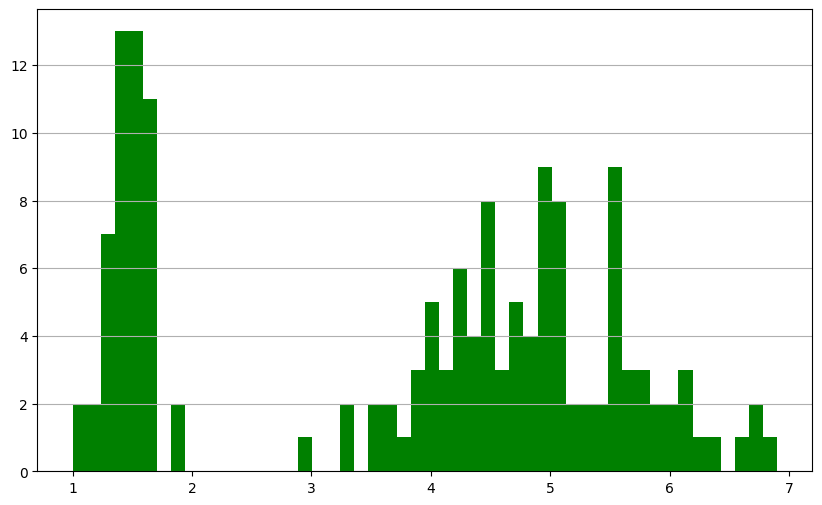

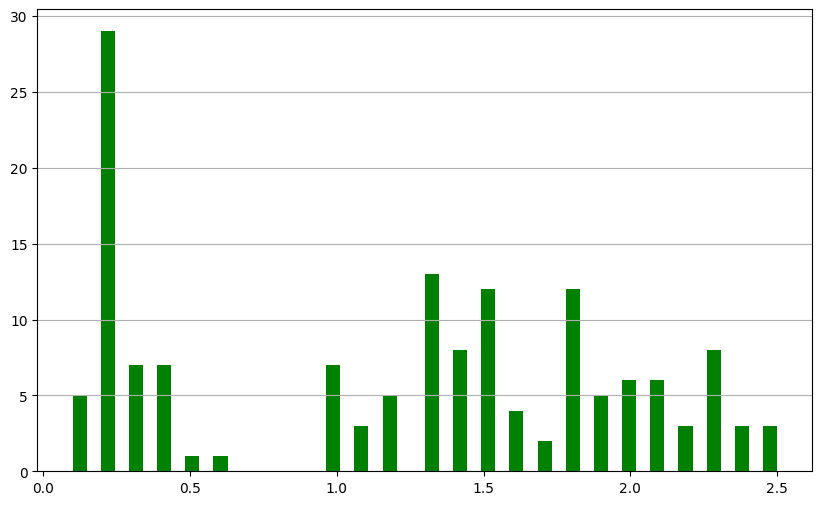

In [30]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(x=df[column], bins=50, color="green")
    plt.grid(axis='y')
    plt.show()
    plt.close()

### Boxplot

Boxplot už je trochu zajímavější. Poskytuje nám zajímavé statististické informace o datové sadě. Horní čárka je maximum, spodní minimum. Horní hranice obdélníku je 3. kvartil, dolní je 1. kvartil. Prostřední čára v obdélníku je medián. Vyskytují-li se v grafu nahoře, nebo dole jakésy kružnice, jsou to anomálie, tzv. outlieři. Tyto hodnoty se nějakým způsobem vymykají ostatním a zpravidla se jich chceme při trénování zbavovat. O tom si povíme v samostatné kapitole.

In [31]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [32]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: >

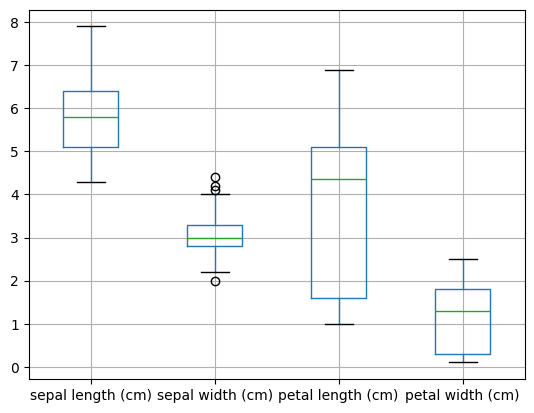

In [33]:
df.boxplot()

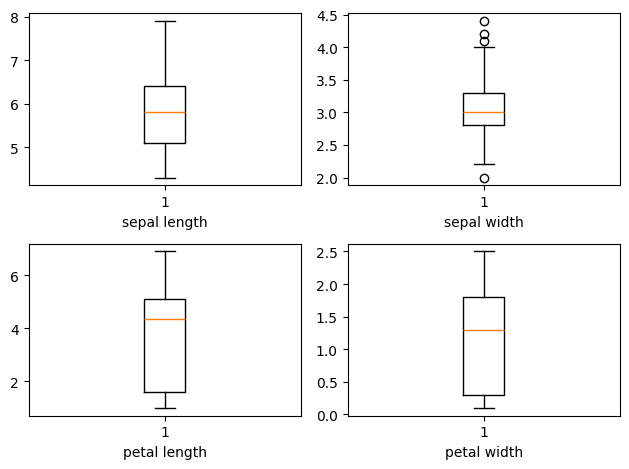

In [36]:
fig, axs = plt.subplots(2, 2)
ax = axs[0, 0]
ax.set_xlabel('sepal length')
ax.boxplot(x=df['sepal length (cm)'])
ax = axs[0, 1]
ax.set_xlabel('sepal width')
ax.boxplot(x=df['sepal width (cm)'])
ax = axs[1, 0]
ax.set_xlabel('petal length')
ax.boxplot(x=df['petal length (cm)'])
ax = axs[1, 1]
ax.set_xlabel('petal width')
ax.boxplot(x=df['petal width (cm)'])
plt.tight_layout()
plt.show()

### Scatterplot

Dalším užitečným grafem je scatterplot. Tento graf typicky ukazuje závislost jednoho atributu na druhém. Jsou to zkrátka tečky. Na x-ové ose je jedna fíčura a na y-ové je druhá. Podívejte se sami.            
Často se využívá také tzv. scatter matrix. Máme tu několik scatter grafů v jednom velkém grafu. Závislot fíčury samy na sobě nedává tak úplně smysl. Místo toho je tu tedy histogram rozdělení.

In [ ]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

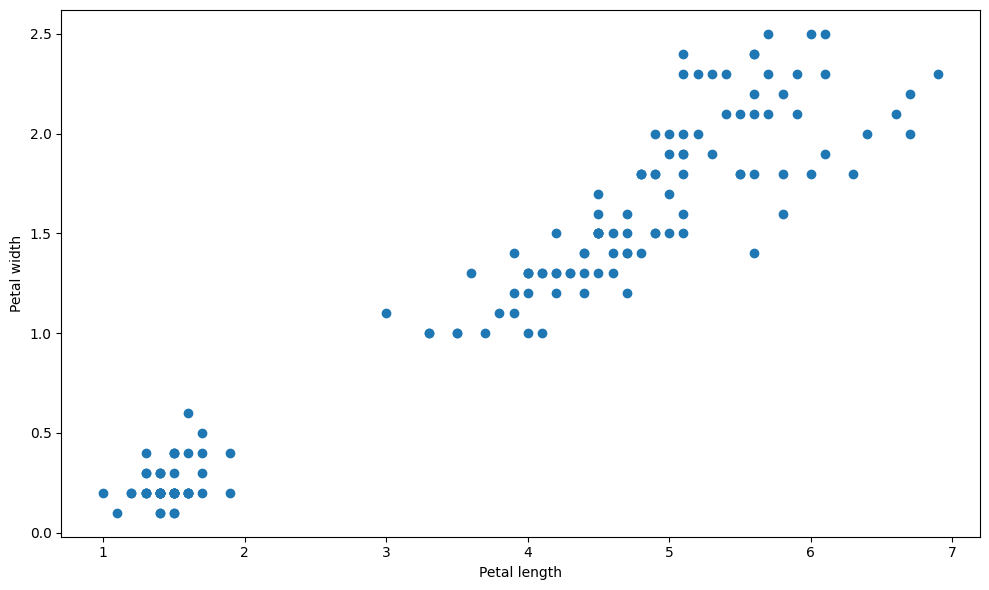

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['petal length (cm)'], y=df['petal width (cm)'])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

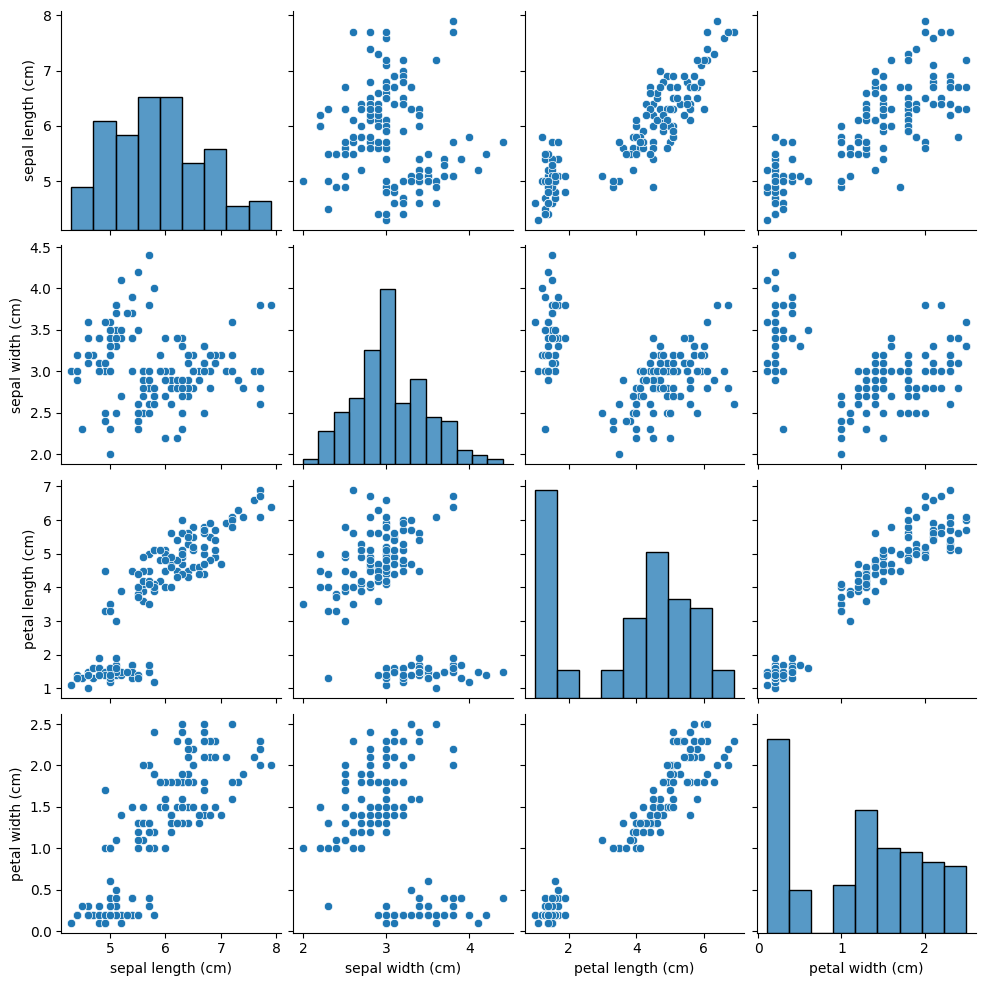

In [40]:
plt.figure(figsize=(10, 6))
sns.pairplot(data=df)
plt.show

### Heatmap

Heatmapu lze využít např. ke zobrazení korelací mezi fíčurami. Existuje metoda *corr()*, která nám ukáže korelace mezi proměnnými. My ji využijeme k vytvoření korelační matice.

In [41]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [45]:
df.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


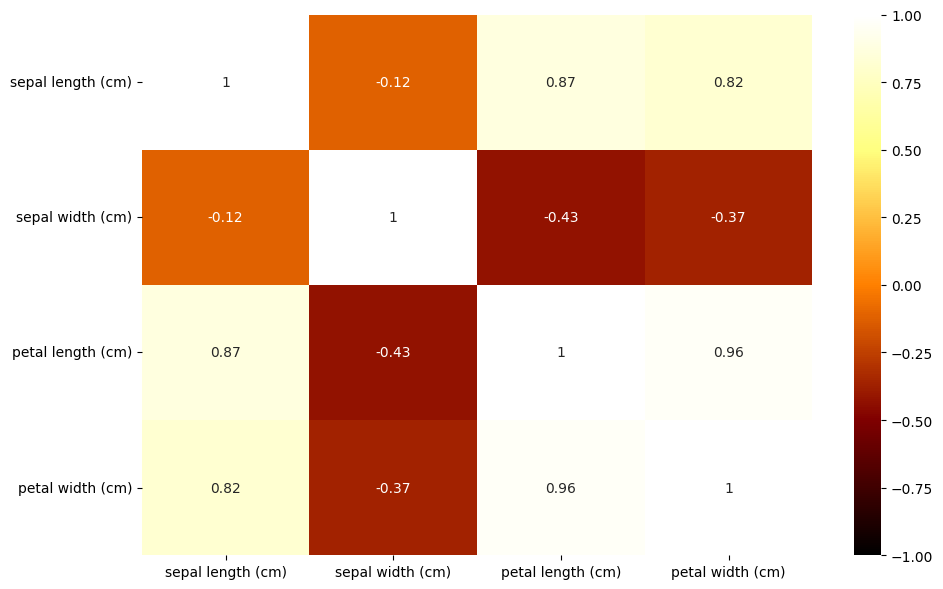

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=df.corr(method='pearson'), annot=True, cmap="afmhot", vmin=-1)
plt.tight_layout()
plt.show()

## **6** Rozdělení dat na trénovací, validační a testovací sadu

Dalším důležitým krokem je rozdělení datové sady na 3. Na sadu trénovací, na které model trénujeme. Na té můžeme libovolně provádět různé operace, třeba odstranění anomálií, které zlepší výsledky na následném testování. Důležité ale je tyto změny dělat POUZE na trénovací sadě. V praxi se totiž model musí umět přizpůsobit jakémukoliv příkladu. Tvoří většinou 60-80% z celkových dat.            
Sada validační slouží k ladění hyperparametrů. O tom si budeme více povídat v příští otázce. Tvoří většinou 10-20% z celkových dat.                 
Poslední sada je testovací. Na té podel pouze a jenom testujeme. Pak na základě různých metrik odhadujeme, jak je dobrý. Také tvoří CCA nějakých 10-20% ze všech dat.

K rozdělení nám pomůže metoda *train_test_split()* z knihovny Sklearn. Určitá konvence tvrdí, že tyto data bychom měli nazývat X_train a y_train, podobně pak X_test a y_test, X_val a y_val

In [51]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.shape

(150, 4)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [56]:
print(f"X train {X_train.shape}, y train {y_train.shape}")
print(f"X val {X_val.shape}, y val {y_val.shape}")
print(f"X test {X_test.shape}, y test {y_test.shape}")

X train (96, 4), y train (96,)
X val (24, 4), y val (24,)
X test (30, 4), y test (30,)


## **7** Zpracování anomálií

Anomálie/outlieři jsou hodnoty, které se nadmíru liší nad ostatními v souboru. Mohou zbytečně zkreslovat a negativně ovlivnit trénovaní, takže se jich chceme zpravidla buď zbavit nebo je nahradit nějakou přijatelnější hodnotou.                     
Pro jejich detekci lze použít např. IQR (Interquartile Range). To je rozsah mezi prvním a třetím kvartilem. Využívá ho např. boxplot. Ten typicky jako outliery označí hodnoty, které jsou od třetího kvartilu o více než 1.5*IQR nebo od prvího kvartilu méně než 1.5*IQR.                     
U normálně rozdělených dat lze využít také např. z-score. To udává, kolik směrodatných odchylek leží hodnota od průměru. Typicky poku je větší než 3, nebo menší než -3, je považována za anomální.         

Podíváme se teď na náš iris dataset a zkusíme se nějak vypořádat s anomálními hodnotami. Nesmíme ale zapomínat, že odstranění anomálních hodnot by mělo probíhat jen a pouze na trénovací sadě.                 
Z EDY víme, že *sepal width* by měl mít nějaké anomální hodnoty.

In [57]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [70]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [71]:
_zscores = zscore(X_train['sepal width (cm)'])
_zscores

138   -0.237179
86    -0.016119
81    -1.563541
20     0.647062
112   -0.237179
         ...   
130   -0.679300
10     1.310243
58    -0.458240
49     0.426002
37     1.089183
Name: sepal width (cm), Length: 96, dtype: float64

In [72]:
(abs(_zscores) > 3).sum()

0

## **8** Normalizace a škálování dat

Některé modely mohou být citlivé na měřítko dat. Proto je důležité je škálovat nebo normalizovat. Tento proces může i zmírnit dopad anomálií.                       
Existuje několik nástrojů na škálování a normalizaci dat. My si je v rychlosti projdeme a ukážeme. Opět je scaler trénujeme pouze na trénovací sadě, aby neunikla žádná budoucí data. Avšak chceme-li pak model využít, musíme data od něj vložená opět škálovat či normalizovat. Proto je stěžejní si scalery uložit.              
Hrát bychom si měli pouze s fíčurami, cílovou proměnnou zpravidla necháváme na pokoji.

In [86]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib

### Standardizace

Standardizace nám data převede do tvaru, ve kterém budou mít průměr 0 a směrodatnou odchylku 1. Neptejte se mě na statististický význam těchto hodnot, to jsem zatím nepobral. Nicméně se to velmi často hodí a zpravidla to zlepšuje performance modelu.           
V knihovně Sklearn je pro tento účel **StandardScaler**.

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [77]:
standart_scaler = StandardScaler()
standart_scaler

StandardScaler()

In [78]:
standart_scaler.fit(X_train)

StandardScaler()

In [81]:
X_train = standart_scaler.transform(X_train)
X_val = standart_scaler.transform(X_val)
X_test = standart_scaler.transform(X_test)
X_val

C:\Users\honzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.16110746, -2.00566166,  0.13183224, -0.2690958 ],
       [-0.44780262, -1.78460136,  0.13183224,  0.12430314],
       [-1.78740481,  0.20494132, -1.39365507, -1.31815965],
       [-1.17849473, -0.01611898, -1.28065601, -1.31815965],
       [-0.81314868,  0.64706191, -1.33715554, -1.31815965],
       [ 2.23140175, -0.23717928,  1.31832236,  1.43563294],
       [ 0.52645351, -1.34248077,  0.640328  ,  0.3865691 ],
       [-0.08245657, -0.90036017,  0.75332706,  0.91110102],
       [-0.20423859, -1.34248077,  0.69682753,  1.042234  ],
       [ 0.52645351, -0.45823958,  1.03582471,  0.77996804],
       [ 0.89179956, -0.23717928,  0.35783035,  0.25543612],
       [ 0.16110746, -0.90036017,  0.75332706,  0.51770208],
       [ 0.16110746,  0.64706191,  0.41432988,  0.51770208],
       [-0.20423859, -0.23717928,  0.2448313 , -0.00682984],
       [-0.81314868, -0.90036017,  0.07533271,  0.25543612],
       [-1.66562279, -1.78460136, -1.39365507, -1.18702667],
       [ 0.77001754, -0.

In [87]:
joblib.dump(standart_scaler, 'standart_scaler.pkl')

['standart_scaler.pkl']

### Normalizace

Normalizace je proces, při kterém hodnoty převádím na nějaký společný rozsah, typicky 0 až 1, nebo -1 až 1.                     
V knihovně Sklearn toto dovede **MinMaxScaler**.

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
minmax_scaler = StandardScaler()
minmax_scaler

StandardScaler()

In [ ]:
minmax_scaler.fit(X_train)

In [ ]:
X_train = minmax_scaler.transform(X_train)
X_val = minmax_scaler.transform(X_val)
X_test = minmax_scaler.transform(X_test)
X_val

In [ ]:
joblib.dump(minmax_scaler, 'standart_scaler.pkl')

## **9** Vyvažování tříd